In [1]:
import numpy as np  
import pandas as pd 

<div id="about_dataset">
    <h2>1. About the dataset 1</h2>
    Dataset 1 includes: Acquisition, processing Covid 19 virus data, NYC Demographic data and Visual analysis.
    <br>
    1. Downloading 5 datasets of Covid 19 Virus in Manhattan, Queens, Brooklyns, Bronx and Staten Island Boroughs from https://www1.nyc.gov/site/doh/covid/covid-19-data-boroughs.page, on the section Daily data. Website data is up-to-date, but we only need the data from beginning until June 21 or before NYC re-openning date.
    5 Borough Datasets  were saved and processed to make a table of sum of all cases, hospitalizations and deaths in 5 borroughs.    
    <br>
    <br>
    2. Using BeautifulSoup to get NYC Demographics from website: https://www.mapsofworld.com/usa/states/new-york/nyc-boroughs-map.html, to make the Demographic table
    <br>
    <br>
    3. Combine Covid 19 virus table and Demographic table for visual analysis
    <br>
    
</div>


<div id="NYC_C0V-19">
    <h2>2. Acquisition and Processing NYC_C0V-19 data </h2>
  
</div>

In [2]:
#5 Borough datasets are retrieved for preprocessing data
csv_path = 'IBM COURSERA/data-rqvAu_MN.csv'
df_MN = pd.read_csv(csv_path, delimiter = ',') # Manhattan recordset
csv_path = 'IBM COURSERA/data-Q7Zjo_BK.csv'
df_BK = pd.read_csv(csv_path, delimiter = ',') # Brooklyn recordse
csv_path = 'IBM COURSERA/data-GHyLp_Bronx.csv'
df_Bronx = pd.read_csv(csv_path, delimiter = ',') # Bronx recordse
csv_path = 'IBM COURSERA/data-HXuvT_QN.csv'
df_QN = pd.read_csv(csv_path, delimiter = ',') # Qeens recordse
csv_path = 'IBM COURSERA/data-u1Bfw-SI.csv'
df_SI = pd.read_csv(csv_path, delimiter = ',') # Staten Island recordse


In [3]:
# Verify Manhattan dataset. 
df_MN.tail(10)

,DATE_OF_INTEREST,Cases,Hospitalizations,Deaths
110,06/18/2020,57,5,4
111,06/19/2020,55,5,4
112,06/20/2020,43,5,2
113,06/21/2020,22,3,4
114,06/22/2020,54,5,5
115,06/23/2020,43,2,3
116,06/24/2020,34,4,2
117,06/25/2020,24,4,1
118,06/26/2020,12,0,0
119,06/27/2020,0,0,0


In [4]:
df_MN.dtypes # Verifying 

DATE_OF_INTEREST    object
Cases                int64
Hospitalizations     int64
Deaths               int64
dtype: object

In [5]:
# Collecting data before NYC re-opening on 06/21/2020 or from record 0 to record 113.
data_MN=df_MN[0:114]
data_Bronx=df_Bronx[0:114]
data_BK=df_BK[0:114]
data_QN=df_QN[0:114]
data_SI=df_SI[0:114]


In [6]:
data_MN.tail() # Verifying after selection

,DATE_OF_INTEREST,Cases,Hospitalizations,Deaths
109,06/17/2020,68,5,3
110,06/18/2020,57,5,4
111,06/19/2020,55,5,4
112,06/20/2020,43,5,2
113,06/21/2020,22,3,4


In [7]:
# Get SUM values of Cases, Hospitalizations adn Deaths in 5 Boroughs
data_MN.loc['total'] = data_MN.select_dtypes(pd.np.number).sum()
Total_MN=data_MN.tail(1)
data_Bronx.loc['total'] = data_Bronx.select_dtypes(pd.np.number).sum()
Total_Bronx=data_Bronx.tail(1)
data_BK.loc['total'] = data_BK.select_dtypes(pd.np.number).sum()
Total_BK=data_BK.tail(1)
data_QN.loc['total'] = data_QN.select_dtypes(pd.np.number).sum()
Total_QN=data_QN.tail(1)
data_SI.loc['total'] = data_SI.select_dtypes(pd.np.number).sum()
Total_SI=data_SI.tail(1)

C:\Users\Farmboy\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\Farmboy\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Farmboy\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
C:\Users\Farmboy\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instea

In [8]:
print("MN",Total_MN)
print("QN",Total_QN)
print("BK",Total_BK)
print("SI",Total_SI)
print("BX",Total_Bronx)


MN       DATE_OF_INTEREST    Cases  Hospitalizations  Deaths
total              NaN  26540.0            7817.0  2401.0
QN       DATE_OF_INTEREST    Cases  Hospitalizations  Deaths
total              NaN  64311.0           16579.0  5352.0
BK       DATE_OF_INTEREST    Cases  Hospitalizations  Deaths
total              NaN  58444.0           14771.0  5350.0
SI       DATE_OF_INTEREST    Cases  Hospitalizations  Deaths
total              NaN  13876.0            2267.0   858.0
BX       DATE_OF_INTEREST    Cases  Hospitalizations  Deaths
total              NaN  47338.0           11834.0  3720.0


In [9]:
# Combining all Sum data into one table
df_total=Total_MN.append(Total_QN)
df_total=df_total.append(Total_BK)
df_total=df_total.append(Total_SI)
df_total=df_total.append(Total_Bronx)
df_total

,DATE_OF_INTEREST,Cases,Hospitalizations,Deaths
total,NaN,26540.0,7817.0,2401.0
total,NaN,64311.0,16579.0,5352.0
total,NaN,58444.0,14771.0,5350.0
total,NaN,13876.0,2267.0,858.0
total,NaN,47338.0,11834.0,3720.0


In [10]:
# Drop the "DATE_OF_INTEREST" column
df_total=df_total.drop(["DATE_OF_INTEREST"], axis = 1) 
df_total

,Cases,Hospitalizations,Deaths
total,26540.0,7817.0,2401.0
total,64311.0,16579.0,5352.0
total,58444.0,14771.0,5350.0
total,13876.0,2267.0,858.0
total,47338.0,11834.0,3720.0


In [11]:
df_total = pd.DataFrame(df_total) 

In [12]:
df_total.dtypes

Cases               float64
Hospitalizations    float64
Deaths              float64
dtype: object

In [13]:
Borough = ['Manhattan','Queens','Brooklyn','Staten Island','Bronx']
df_total.insert(0, "Borough", Borough, True)


In [14]:
df_total.reset_index(drop=True, inplace=True)

In [15]:
# The final step to get NYC Cov-19 virus table
df_CoV=df_total.loc[:5]
df_CoV

,Borough,Cases,Hospitalizations,Deaths
0,Manhattan,26540.0,7817.0,2401.0
1,Queens,64311.0,16579.0,5352.0
2,Brooklyn,58444.0,14771.0,5350.0
3,Staten Island,13876.0,2267.0,858.0
4,Bronx,47338.0,11834.0,3720.0


In [16]:
df_CoV.to_csv ('Cov_19_NYC.csv',index = False)
# Save table 

<div id="NYC_Demographic_data">
    <h2>3. Acquisition and Processing NYC Demographic data </h2>
        
</div>
 Using BeautifulSoup to scrap demographic data from website

In [17]:
import os
import re
import requests
from bs4 import BeautifulSoup
!easy_install lxml
!pip install lxml

Searching for lxml
Best match: lxml 4.5.0
Adding lxml 4.5.0 to easy-install.pth file

Using c:\users\farmboy\anaconda3\lib\site-packages
Processing dependencies for lxml
Finished processing dependencies for lxml


In [18]:
web_url1=requests.get('https://www.mapsofworld.com/usa/states/new-york/nyc-boroughs-map.html').text
soup = BeautifulSoup(web_url1,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   NYC Boroughs Map, 5 Boroughs, Five Boroughs of NYC
  </title>
  <meta content="NYC Boroughs Map - NYC is composed of five boroughs namely Manhattan, the Bronx, Queens, Brooklyn, and Staten Island" name="Description"/>
  <meta content="Boroughs of New York City, Boroughs Map of New York City, New York City Boroughs Map, List of Boroughs of New York City" name="Keywords"/>
  <link href="https://www.mapsofworld.com/amp/usa/states/new-york/nyc-boroughs-map.html" rel="amphtml"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="@Mapsofworld" name="twitter:site"/>
  <meta content="https://www.mapsofworld.com/usa/usa-maps/new-york-city-map.jpg" name="twitter:image:src"/>
  <meta content="NYC Boroughs Map, 5 Boroughs, Five Boroughs of NYC" name="twitter:title"/>
  <meta content="NYC Boroughs Map - Explore map of 5 Boroughs of New York City, NYC is composed of five boroughs including Manhattan, the Bronx, Queens, B

In [19]:
Demo_table = soup.find('table',{'class':'tableizer-table'})
Demo_table

<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th>Borough</th><th>County</th><th>Area (sq. miles)</th><th>Population</th></tr></thead><tbody>
<tr><td><a href="https://www.mapsofworld.com/usa/states/new-york/manhattan-map.html">Manhattan</a></td><td>New York</td><td>23</td><td>1,636,268</td></tr>
<tr><td>Queens</td><td>Queens</td><td>109</td><td>2,321,580</td></tr>
<tr><td>Brooklyn</td><td>Kings</td><td>71</td><td>2,621,793</td></tr>
<tr><td><a href="https://www.mapsofworld.com/islands/staten-island.html">Staten Island</a></td><td>Richmond</td><td>58</td><td>473,279</td></tr>
<tr><td><a href="https://www.mapsofworld.com/usa/states/new-york/counties/bronx-county.html">The Bronx</a></td><td>Bronx </td><td>42</td><td>1,438,159</td></tr>
</tbody></table>

In [20]:
def process_num(num):
    return float(re.sub(r'[^\w\s.]','',num))

In [21]:
num1 = float(re.sub(r'[^\w\s.]','','1,636,268'))
num1

1636268.0

In [22]:
Boroughs =[]
Counties =[]
Area_sq_miles = []
Populations=[]
for table in Demo_table:
    rows = Demo_table.find_all('tr')
    
    for row in rows:
        cells = row.find_all('td')
        
        
        if len(cells) > 1:
            Borough = cells[0]
            Boroughs.append(Borough.text.strip())
            
            County = cells[1]
            Counties.append(County.text.strip())
    
            Area_sq_mile = cells[2]
            Area_sq_miles.append(int(Area_sq_mile.text))
            
            Population = cells[3]
            Populations.append(process_num(Population.text.strip()))
            
         

In [23]:
#Collecting data to DataFrame
df1 = pd.DataFrame()
df1['Borough'] = Boroughs
df1['County'] = Counties
df1['Area_sq_miles'] = Area_sq_miles
df1['Population'] = Populations  
df1.head()

,Borough,County,Area_sq_miles,Population
0,Manhattan,New York,23,1636268.0
1,Queens,Queens,109,2321580.0
2,Brooklyn,Kings,71,2621793.0
3,Staten Island,Richmond,58,473279.0
4,The Bronx,Bronx,42,1438159.0


In [24]:
print(df1.shape)

(15, 4)


In [25]:
# Selecting 5 rows only, because of repeating
df2=df1.drop(columns='County')
df3=df2.loc[0:4]
df3

,Borough,Area_sq_miles,Population
0,Manhattan,23,1636268.0
1,Queens,109,2321580.0
2,Brooklyn,71,2621793.0
3,Staten Island,58,473279.0
4,The Bronx,42,1438159.0


In [26]:
df4=df3.replace(to_replace ="The Bronx", 
                 value ="Bronx", inplace=True) 

C:\Users\Farmboy\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [27]:
from pandas import DataFrame
df4=DataFrame(df3)
df4.head()

,Borough,Area_sq_miles,Population
0,Manhattan,23,1636268.0
1,Queens,109,2321580.0
2,Brooklyn,71,2621793.0
3,Staten Island,58,473279.0
4,Bronx,42,1438159.0


In [28]:
df4[["Area_sq_miles", "Population"]] = df3[["Area_sq_miles", "Population"]].astype("float")

In [29]:
# Count the population density or number of resident per square mile
df4['Density']=df4['Population']/df4['Area_sq_miles']
df4.round({"Density":0}) 

,Borough,Area_sq_miles,Population,Density
0,Manhattan,23.0,1636268.0,71142.0
1,Queens,109.0,2321580.0,21299.0
2,Brooklyn,71.0,2621793.0,36927.0
3,Staten Island,58.0,473279.0,8160.0
4,Bronx,42.0,1438159.0,34242.0


In [30]:
df4.to_csv ('Demo_Newyork.csv',index = False)
# Save table 

<div id="Final_Data">
    <h2>4. NYC Demographic and CoV-19 virus Data </h2>
  
</div>

In [31]:
# Combination of Demographic table and Covid-19 table
df_uni=pd.merge(df4,df_CoV, on='Borough')
df_uni

,Borough,Area_sq_miles,Population,Density,Cases,Hospitalizations,Deaths
0,Manhattan,23.0,1636268.0,71142.086957,26540.0,7817.0,2401.0
1,Queens,109.0,2321580.0,21298.899083,64311.0,16579.0,5352.0
2,Brooklyn,71.0,2621793.0,36926.661972,58444.0,14771.0,5350.0
3,Staten Island,58.0,473279.0,8159.982759,13876.0,2267.0,858.0
4,Bronx,42.0,1438159.0,34241.880952,47338.0,11834.0,3720.0


In [32]:
df_uni['Cases_per_sqmile']=df_uni['Cases']/df_uni['Area_sq_miles']
df_uni.round({"Cases_per_sqmile":0}) 
df_uni['Cases_per_10000']=df_uni['Cases']*10000/df_uni['Population']
df_uni.round({"Cases_per_10000":0})

,Borough,Area_sq_miles,Population,Density,Cases,Hospitalizations,Deaths,Cases_per_sqmile,Cases_per_10000
0,Manhattan,23.0,1636268.0,71142.086957,26540.0,7817.0,2401.0,1153.913043,162.0
1,Queens,109.0,2321580.0,21298.899083,64311.0,16579.0,5352.0,590.009174,277.0
2,Brooklyn,71.0,2621793.0,36926.661972,58444.0,14771.0,5350.0,823.154930,223.0
3,Staten Island,58.0,473279.0,8159.982759,13876.0,2267.0,858.0,239.241379,293.0
4,Bronx,42.0,1438159.0,34241.880952,47338.0,11834.0,3720.0,1127.095238,329.0


In [33]:
# Select the columns for Visual analysis
df_zone = pd.DataFrame(df_uni,columns=['Borough','Cases_per_sqmile','Cases_per_10000','Area_sq_miles']) 


In [34]:
df_zone.sort_values(by='Cases_per_sqmile', inplace=True, ascending=False)
df_zone.reset_index(drop=True, inplace=True)     
df_zone

,Borough,Cases_per_sqmile,Cases_per_10000,Area_sq_miles
0,Manhattan,1153.913043,162.198368,23.0
1,Bronx,1127.095238,329.156929,42.0
2,Brooklyn,823.154930,222.916149,71.0
3,Queens,590.009174,277.013930,109.0
4,Staten Island,239.241379,293.188584,58.0


In [35]:
df_zone.to_csv ('NYC_Demo_CoV.csv',index = False)
# Save table 

<div id="Visualization">
    <h2>5. Visualization </h2>
  
</div>

In [36]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


In [37]:
import seaborn as sns
print('Seaborn installed and imported!')

Seaborn installed and imported!


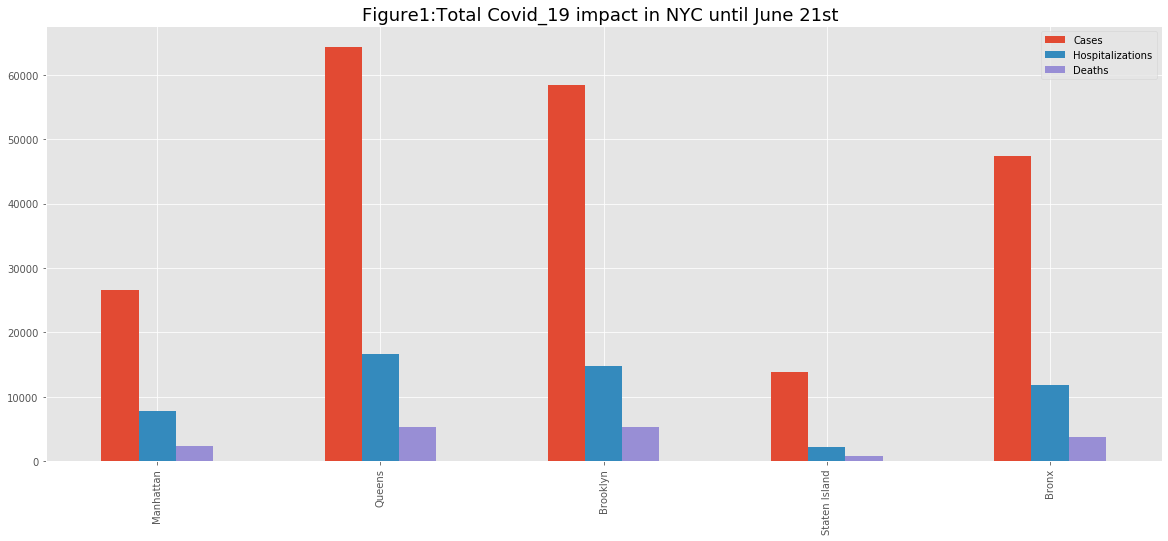

In [38]:
ax = df_CoV.loc[0:4].plot(kind='bar', stacked=False, figsize=(20, 8)
                   )
ax.set_title(("Figure1:Total Covid_19 impact in NYC until June 21st "), fontsize=18)
#ax.set_axcolor('grey')
ax.set_xticklabels(df_CoV['Borough'])

plt.show()

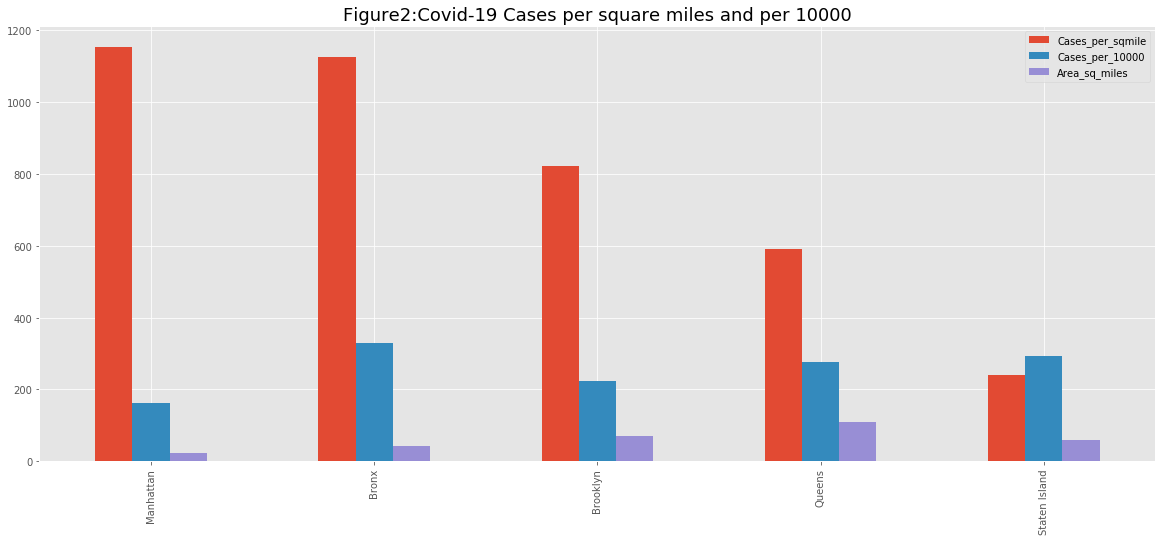

In [39]:
ax = df_zone.loc[0:5].plot(kind='bar', stacked=False, figsize=(20, 8))
                    
ax.set_title(("Figure2:Covid-19 Cases per square miles and per 10000"), fontsize=18)

ax.set_xticklabels(df_zone['Borough'])

plt.show()

<div id="evaluation">
    <h2>6. Evaluation </h2>
  
</div>

<div >
    <br>
    Figure 2 shows: Bronx and Manhattan are leading with approximately 1100 per square mile. Bronx also has the highest cases per 10000.
    <br>
    Based upon the cases per square mile and cases per 10000, apparently Bronx is the most affected borough by the virus.         
    <br>
    From these 2 points, 2 groups are selected for further evaluation:
        <br>
        <br> Group 1 with dominant cases per square includes Bronx and Manhattan
        <br> Group 2 with higher cases includes Brooklyn and Queens.
        <br> Staten Island stands in the third category.
</div>